In [1]:
import requests
import pandas as pd
from datetime import datetime

In [12]:
# Set your API key here
API_KEY = '32fe0429fe56551e2beaeec5a2bd3149'
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"

In [13]:
# Function to fetch data
def get_weather_data(city):
    complete_url = f"{BASE_URL}q={city}&appid={API_KEY}&units=metric"
    response = requests.get(complete_url)
    data = response.json()

    # If the response is valid (code 200)
    if data.get('cod') != 200:  # Check if the response is successful
        print(f"Error fetching data for {city}: {data.get('message', 'Unknown error')}")
        return None
    return data

# List of cities you want to fetch weather data for
cities = ['London', 'New York', 'Paris', 'Tokyo', 'Sydney']

weather_data = []

# Fetch weather data for each city
for city in cities:
    data = get_weather_data(city)
    if data:  # Only proceed if the data is valid
        main_data = data['main']
        weather = data['weather'][0]
        city_data = {
            'city': city,
            'temperature': main_data['temp'],
            'pressure': main_data['pressure'],
            'humidity': main_data['humidity'],
            'weather': weather['description'],
            'timestamp': datetime.now()
        }
        weather_data.append(city_data)

# Convert the collected data into a pandas DataFrame
df = pd.DataFrame(weather_data)

# Display the DataFrame
print(df)

       city  temperature  pressure  humidity          weather  \
0    London         7.45       995        83  overcast clouds   
1  New York         2.49      1008        41        clear sky   
2     Paris         8.68      1000        86       light rain   
3     Tokyo         5.31      1009        33       few clouds   
4    Sydney        20.99      1017        72    broken clouds   

                   timestamp  
0 2025-01-28 17:16:08.753276  
1 2025-01-28 17:16:09.485270  
2 2025-01-28 17:16:09.697829  
3 2025-01-28 17:16:10.079895  
4 2025-01-28 17:16:10.375415  


In [14]:
# Save the data to a CSV file
df.to_csv('weather_data.csv', index=False)

In [15]:
avg_temperature = df['temperature'].mean()
print(f"Average Temperature: {avg_temperature:.2f} °C")

Average Temperature: 8.98 °C


In [16]:
highest_temp_city = df.loc[df['temperature'].idxmax()]
print(f"City with highest temperature: {highest_temp_city['city']} with {highest_temp_city['temperature']} °C")

City with highest temperature: Sydney with 20.99 °C


In [17]:
weather_count = df['weather'].value_counts()
print("Weather types distribution:")
print(weather_count)

Weather types distribution:
weather
overcast clouds    1
clear sky          1
light rain         1
few clouds         1
broken clouds      1
Name: count, dtype: int64


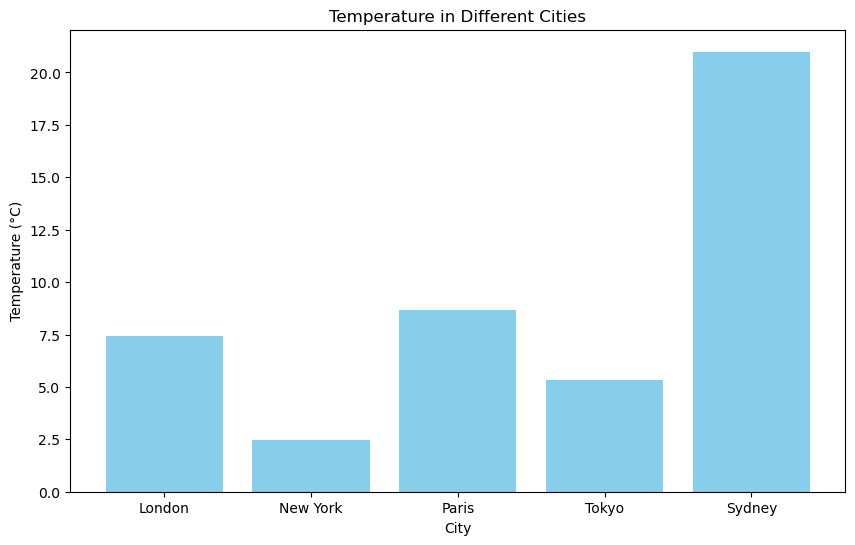

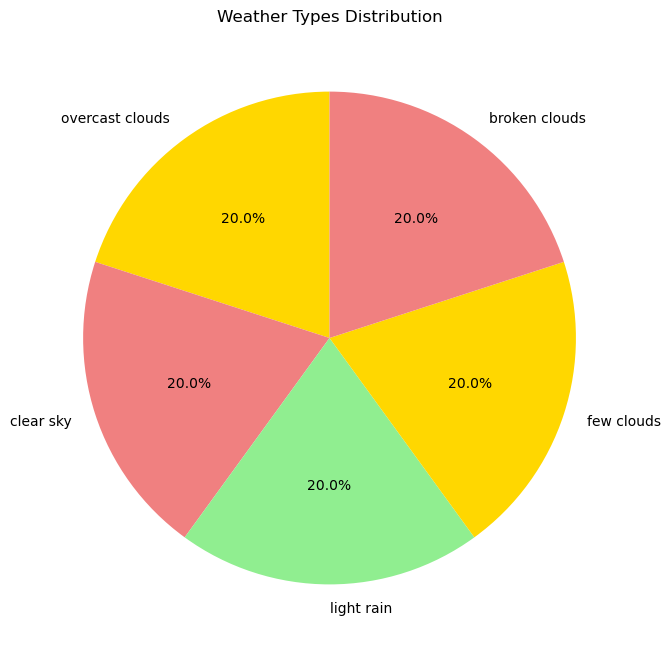

In [18]:
import matplotlib.pyplot as plt

# Bar plot of temperatures in different cities
plt.figure(figsize=(10, 6))
plt.bar(df['city'], df['temperature'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Different Cities')
plt.show()

# Pie chart for weather type distribution
plt.figure(figsize=(8, 8))
weather_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightgreen'])
plt.title('Weather Types Distribution')
plt.ylabel('')
plt.show()